#### A smooth function that has a minimum, yet both its first and second derivatives are zero at that minimum.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    y = np.zeros_like(x)
    nonzero = x != 0
    y[nonzero] = np.exp(-1 / x[nonzero]**2)
    return y

# Create input values excluding 0 to avoid division by zero
x = np.linspace(-2, 2, 1000)
x[500] = 1e-10  # Replace the midpoint with a very small nonzero value to simulate x = 0

# Plot the function
plt.figure(figsize=(6, 4))
plt.plot(x, f(x), label=r'$f(x) = e^{-1/x^2}$ for $x \ne 0$, $f(0) = 0$')
plt.title('Plot of $f(x) = e^{-1/x^2}$ (smooth non-analytic function)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.savefig('smooth_min.png', dpi=90)
plt.show()


#### Payoff of put and call with variance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def black_scholes_call(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def black_scholes_put(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Parameters
K = 100.0
r = 0.0
sigma = 1
T = 1.0

S_values = np.linspace(0, 2*K, 200)
call_payoff_T = np.maximum(S_values - K, 0)
put_payoff_T  = np.maximum(K - S_values, 0)
call_value_0 = black_scholes_call(S_values, K, r, sigma, T)
put_value_0  = black_scholes_put(S_values, K, r, sigma, T)

plt.figure(figsize=(6, 4))

# Plot Call
plt.plot(S_values, call_payoff_T, label='Call Payoff at T', color='blue')
plt.plot(S_values, call_value_0, label='Call Value at t=0', color='blue', linestyle='--')

# Plot Put
plt.plot(S_values, put_payoff_T, label='Put Payoff at T', color='red')
plt.plot(S_values, put_value_0, label='Put Value at t=0', color='red', linestyle='--')

# Strike annotation
plt.axvline(K, color='gray', linestyle=':')

# Intersection points
plt.scatter([K, K], [0, 0], color=['blue', 'red'], zorder=5)
plt.text(K, 0, '  (K,0)', color='black', va='bottom')

plt.title(r'Call and Put Option: Payoffs at T vs. Values at t=0, $\sigma=1$')
plt.xlabel('Underlying Price S at $t=0$ or at $t=T$')
plt.ylabel('Payoff or Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('call_put_payoff.png', dpi=90)
plt.show()


#### Softmax function with two classes in 1D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def softmax(x, w1, w2, b1, b2):
    z1 = w1 * x + b1
    z2 = w2 * x + b2
    e1 = np.exp(z1)
    e2 = np.exp(z2)
    sum_exp = e1 + e2
    return e1 / sum_exp, e2 / sum_exp

def plot_softmax(w1=1.0, w2=-1.0, b1=0.0, b2=0.0):
    x = np.linspace(-10, 10, 400)
    p1, p2 = softmax(x, w1, w2, b1, b2)

    plt.figure(figsize=(8, 5))
    plt.plot(x, p1, label='P(class = 1 | x)', color='blue')
    plt.plot(x, p2, label='P(class = 2 | x)', color='red')
    plt.title("Softmax Probabilities with 2 Classes")
    plt.xlabel("x")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()

interact(
    plot_softmax,
    w1=FloatSlider(min=-5, max=5, step=0.1, value=1.0, description="w1"),
    w2=FloatSlider(min=-5, max=5, step=0.1, value=-1.0, description="w2"),
    b1=FloatSlider(min=-5, max=5, step=0.1, value=0.0, description="b1"),
    b2=FloatSlider(min=-5, max=5, step=0.1, value=0.0, description="b2"),
);


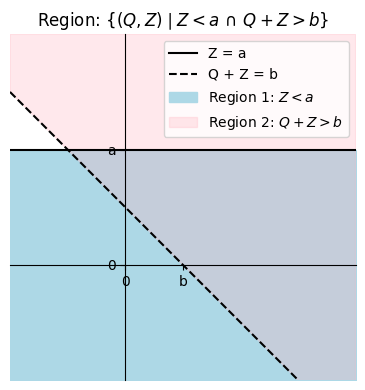

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------------------------
# Example fixed values so you can see the region clearly:
# a=2, b=1. Adjust these to your actual a, b.
# Condition: Z<a (Z<2) AND Q+Z>b (Q+Z>1).
# --------------------------------------------------------------------
a = 2
b = 1
# set aspect ratio to 1:1
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title(r"Region: $\{(Q,Z)\mid Z<a \,\cap\, Q+Z>b\}$")

# --------------------------------------------------------------------
# 1) Move the spines so the axes are along x=0 and y=0
#    and remove top/right spines.
# --------------------------------------------------------------------
ax.spines['left'].set_position('zero')   # y-axis on x=0
ax.spines['bottom'].set_position('zero') # x-axis on y=0
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# --------------------------------------------------------------------
# 2) Define a grid of Q values for plotting lines/fills
# --------------------------------------------------------------------
Q = np.linspace(-2, 4, 400)

# Lines for the boundaries:
Z_line_a     = a              # horizontal line: Z = a
Z_line_bQ    = b - Q          # diagonal line:   Z = b - Q

# We'll choose some vertical extent (Z-min, Z-max) for fill_between:
Z_min, Z_max = -2, 4

# --------------------------------------------------------------------
# 3) Plot the boundary lines for reference
# --------------------------------------------------------------------
ax.plot(Q, [Z_line_a]*len(Q), 'k-',  label='Z = a')
ax.plot(Q, Z_line_bQ,         'k--', label='Q + Z = b')

# --------------------------------------------------------------------
# 4) Region 1: Z < a
#    => fill below Z=a
# --------------------------------------------------------------------
ax.fill_between(
    Q,
    Z_min,             # from some lower bound
    Z_line_a,          # up to Z=a
    color='lightblue',
    alpha=1,
    label=r'Region 1: $Z < a$'
)

# --------------------------------------------------------------------
# 5) Region 2: Q + Z > b
#    => Z > b - Q
#    => fill above line Z = b - Q
# --------------------------------------------------------------------
ax.fill_between(
    Q,
    Z_line_bQ,         # from line Z = b - Q
    Z_max,             # up to an upper bound
    color='lightpink',
    alpha=0.3,
    label=r'Region 2: $Q+Z > b$'
)

# --------------------------------------------------------------------
# 6) Show just the ticks at 0, a, b and no others
# --------------------------------------------------------------------
# We'll let Q-axis have ticks at 0 and b
# and the Z-axis have ticks at 0 and a.
# If you want to show b on the Z-axis instead, or handle sign issues,
# just adapt accordingly.
ax.set_xticks([0, b])
ax.set_xticklabels(['0', 'b'])

ax.set_yticks([0, a])
ax.set_yticklabels(['0', 'a'])

# --------------------------------------------------------------------
# 7) Set a viewing window that shows both lines and intersection
# --------------------------------------------------------------------
ax.set_xlim(-2, 4)
ax.set_ylim(-2, 4)

ax.legend(loc='upper right')
ax.set_aspect('equal', 'box')
plt.tight_layout()
plt.savefig('region_plot.png', dpi=90, bbox_inches='tight')
plt.show()
